### GRADIENT DESCENT
I have implemented a vanilla gradient descent method in step_gradient function. 

I have also added 2 different modifications to the vanilla gradient descent optimizer. I have added an early stopping feature, which can be controlled by **early_stop_number** parameter and also I have added adaptive learning rate, through which the learning rate increases by .00002 everytime the error value decreases consecutively for more than 3 times. This aims to increase the computational speed. This feature can be controlled via the **modify_lr** flag.

In [1]:
import data_parser as dp #Load in the parser script
import matplotlib.pylab as plt #For data visualization

def compute_total_error(b,m,points): #Computes total mean squared error
    totalError = 0
    for i in range(len(points)):
        x = points[i,0]
        y = points[i,1]
        totalError += (y - (m * x + b)) ** 2 #Error is calculated as y' = mx + b(Assuming linear regression) so E = (y-y')^2, summed over all points

    return totalError/float(len(points)) #Returning the mean squared error.

def step_gradient(curr_m, curr_b, points, lr): #Gradient Descent Function.
    dt_db = 0 #Initialize the partial derivative w.r.t b
    dt_dm = 0 #Initialize the partial derivative w.r.t m
    for i in range(len(points)):
        x = points[i,0]
        y = points[i,1]
        t = y - (curr_m*x + curr_b) #find t = (y - (m*x + b))
        dt_dm += -1 * x * t #dt/dm = -x*t
        dt_db += -1 * t # dt/db = -1*t

    dt_dm = (2*dt_dm)/float(len(points))
    dt_db = (2*dt_db)/float(len(points)) #Calculating the average derivative over all points. 2 is a common multiple which is obtained due to chain rule of differentiation and so for computational speed is multiplied in the end.

    m = curr_m - (lr * dt_dm) #Reseting the m, b value as per the derivative
    b = curr_b - (lr * dt_db)

    return [m,b]

def gradient_descent_driver(points, start_m, start_b, lr, num_iterations, early_stop_number = 0, modify_lr = False):# The gradient_descent driver function. Controls the number of iterations and also other descent features like early stopping and variable learning rate.
    #early stop number param is used to set an early stopping value, if the error value remains the same over early_stop_number number of iterations, then to save unwanted extra computations, the learning is stopped.
    #modify_lr is a flag variable. If it is set to True then as the error value keeps decreasing, the speed of learning increases, due to confidence that learning is going in the right direction.
    #Incase the descent overshoots the minimal point, the error increases, we then reset the learning rate to the initial 0.00005 value.
    m = start_m #initial slope
    b = start_b #initial intercept
    stop_number = 0 #initial early stopping iterator
    error = [] #The error array.
    modify_lr_num = 3 #The number of iterations in which error must decrease before increasing the learning rate.
    er_decrease = 0 #The number of iterations in which learning rate has decreased continuously.
    for i in range(num_iterations):
        m, b = step_gradient(m, b, points, lr) #Get the new m and b vals.
        er = compute_total_error(b,m,points) #Compute Mean Square error for new m,b
        er = round(er,2) #Round to first 2 decimal places.
        # print(er)
        if i>=1 and error[len(error)-1] == er and early_stop_number != 0: #For early stopping
            stop_number += 1
            if stop_number == early_stop_number: #If early stopping does take place, then execute this code.
                print('Executing early stopping')
                break
        else: #If there is a change after a few iterations but less than early_stop_number then reset to 0.
            stop_number = 0

        if modify_lr and er<compute_total_error(b,m,points): #For modified lr
            er_decrease+=1 #er has decreased continuously.
            if er_decrease%modify_lr_num == 0: #If there is continuous decrease for modify_lr_num times then increase lr.
                print('Increasing lr for faster descent')
                lr += 0.00002
        else: #If there is no continuous decrease, reset values to defaults.
            er_decrease = 0
            lr = 0.00005
        error.append(er) #Append the calculated error.

    print('Finished with an lr of %f'%(lr))
    return [m,b,error]

def plot_line_data(points, m, b): #Plots the calculated line from m and b
    X = points[:,0]
    Y = points[:,1]
    plt.plot(X, Y, 'bo') #First plots the data points
    plt.plot(X, m * X + b) #Plot the line.
    plt.axis([0,1.5* max(X), 0, 1.3 * max(Y)]) #Set the axes range.
    plt.title("Best line.")
    plt.text(10, 130, "m="+str(round(m,4))+"  b="+str(round(b,4)))
    plt.show() #shows the graph.
    return

def plot_error_data(error_value): #plots the error value decrease vs iterations.
    num_iterations = range(len(error_value))
    print('min_error and max_errors are %.2f, %.2f'%(min(error_value), max(error_value)))
    plt.plot(num_iterations, error_value) #plots iterations vs error_value
    plt.axis([0,1.5*max(num_iterations), min(error_value)-5, max(error_value) + 5])
    plt.xlabel('iterations')
    plt.ylabel('error_value')
    plt.text(10,130,'Min_Error value is :'+str(min(error_value))) #Shows min error value.
    plt.show() #shows the plot.
    return

def run(initial_m=0, initial_b = 1):
    points = dp.get_data() #Retrieves data using the data_parser code.
    learning_rate = 0.00005
    #initial_b = 1 # initial y-intercept guess
    #initial_m = 0 # initial slope guess
    num_iterations = 1000
    print("Starting gradient descent at b = {0}, m = {1}, error = {2}".format(initial_b, initial_m, compute_total_error(initial_b, initial_m, points)))
    print("Running...")
    [m, b, error] = gradient_descent_driver(points, initial_b, initial_m, learning_rate, num_iterations, early_stop_number = 5, modify_lr = True)
    print("After {0} iterations b = {1}, m = {2}, error = {3}".format(num_iterations, b, m, compute_total_error(b, m, points)))
    plot_line_data(points, m, b)
    plot_error_data(error)
    return m,b

Loaded df of size 100
Starting gradient descent at b = 1, m = 0, error = 5420.637733375842
Running...
Increasing lr for faster descent
Increasing lr for faster descent
Increasing lr for faster descent
Increasing lr for faster descent
Executing early stopping
Finished with an lr of 0.000070
After 1000 iterations b = 0.010255281480601603, m = 1.4791537758855613, error = 112.66203471406898


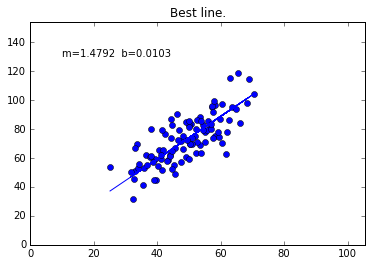

min_error and max_errors are 112.66, 435.50


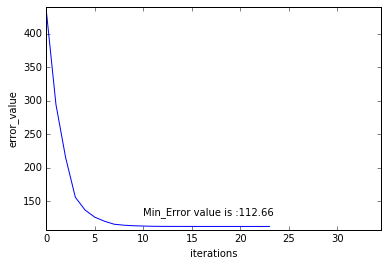

(1.4791537758855613, 0.010255281480601603)

In [2]:
run()